In [2]:
!pip install keras==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.14.0 which is incompatible.


In [3]:
!pip install scikeras

from scikeras.wrappers import KerasClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0


In [4]:

from scikeras.wrappers import KerasClassifier

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Alphabets_data.csv")

In [ ]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
df.shape

(20000, 17)

In [10]:
df.isna().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [11]:
df.duplicated().sum()

1332

In [12]:
count = df['letter'].value_counts()
count

,count
letter,
U,813
D,805
P,803
T,796
M,792
A,789
X,787
Y,786
N,783


In [13]:
#creating an dataframe for counts and letters
count_df = df['letter'].value_counts().reset_index()
count_df.columns = ['letter','count']
count_df

,letter,count
0,U,813
1,D,805
2,P,803
3,T,796
4,M,792
5,A,789
6,X,787
7,Y,786
8,N,783
9,Q,783


<ipython-input-14-3c0af56952e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='letter',y='count',data = count_df,palette='coolwarm')


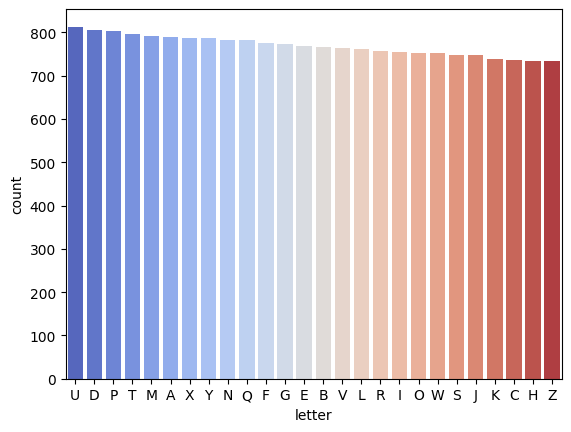

In [14]:
#barplot
sns.barplot(x='letter',y='count',data = count_df,palette='coolwarm')
plt.show()

In [15]:
x=df.drop('letter',axis = 1)
y=df['letter']
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
y

,letter
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [16]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_standardized = sc.fit_transform(x)
x_standardized

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [18]:
y.shape

(20000,)

## Model Building

### train test split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 53)

In [22]:
#converting labels to categorical
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test labels using the trained encoder
y_test_encoded = label_encoder.transform(y_test)

# Now apply to_categorical
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

In [23]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
#creating model
from keras.models import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=16))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(x_train,y_train_cat,epochs=50,batch_size = 32,validation_data=(x_test,y_test_cat))

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6428 - loss: 1.3035 - val_accuracy: 0.7205 - val_loss: 1.0312
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7163 - loss: 1.0322 - val_accuracy: 0.7575 - val_loss: 0.8954
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7596 - loss: 0.8734 - val_accuracy: 0.7828 - val_loss: 0.7916
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7748 - loss: 0.7724 - val_accuracy: 0.8092 - val_loss: 0.7010
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7944 - loss: 0.7194 - val_accuracy: 0.8052 - val_loss: 0.6763
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.6680 - val_accuracy: 0.8158 - val_loss: 0.6369
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8180 - loss: 0.6078 - val_accuracy: 0.8225 - val_loss: 0.6045
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8284 - loss: 0.5757 - val_accuracy: 0.

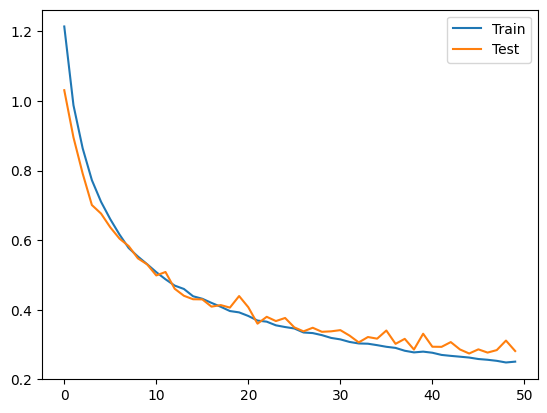

In [42]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.legend(loc='best')

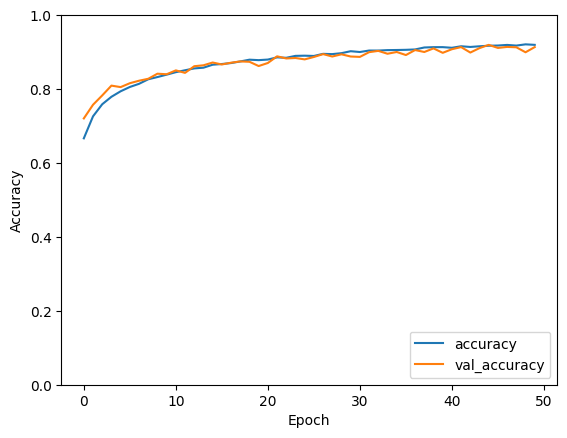

In [43]:
#plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Hyperparameter Tuning

In [50]:
#creating default model
def create_model():
  model = Sequential()
  model.add(Dense(64,input_dim=16,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(len(label_encoder.classes_),activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [45]:
import warnings
warnings.filterwarnings('ignore')

## Tuning : 1.batch size 2. Epochs


In [51]:
model = KerasClassifier(model=create_model,verbose=0)
param_grid = {
    'batch_size':[100,200,300],
    'epochs':[20,30,50]
}
#gridsearch
from sklearn.model_selection import GridSearchCV,KFold
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result = grid.fit(x_train,y_train_cat)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=100, epochs=20...................................
[CV 1/5; 1/9] END ....batch_size=100, epochs=20;, score=0.818 total time=   6.7s
[CV 2/5; 1/9] START batch_size=100, epochs=20...................................
[CV 2/5; 1/9] END ....batch_size=100, epochs=20;, score=0.823 total time=   8.0s
[CV 3/5; 1/9] START batch_size=100, epochs=20...................................
[CV 3/5; 1/9] END ....batch_size=100, epochs=20;, score=0.830 total time=   6.8s
[CV 4/5; 1/9] START batch_size=100, epochs=20...................................
[CV 4/5; 1/9] END ....batch_size=100, epochs=20;, score=0.837 total time=   7.8s
[CV 5/5; 1/9] START batch_size=100, epochs=20...................................
[CV 5/5; 1/9] END ....batch_size=100, epochs=20;, score=0.828 total time=   6.6s
[CV 1/5; 2/9] START batch_size=100, epochs=30...................................
[CV 1/5; 2/9] END ....batch_size=100, epochs=30;,

In [47]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.9071875, using {'batch_size': 100, 'epochs': 50}


## Tuning : 1. Activation Function     2.Neurons

In [58]:
def create_model(activation='relu',neurons=64):
  model = Sequential()
  model.add(Dense(neurons,input_dim=16,activation=activation))
  model.add(Dense(neurons,activation=activation))
  model.add(Dense(len(label_encoder.classes_),activation='softmax'))
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'])
  return model

model = KerasClassifier(model=create_model,verbose=0)
param_grids = {
    'model__activation': ['tanh','relu','linear'],
    'model__neurons': [64,32,26]
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train_cat)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START model__activation=tanh, model__neurons=64...................
[CV 1/5; 1/9] END model__activation=tanh, model__neurons=64;, score=0.656 total time=   1.7s
[CV 2/5; 1/9] START model__activation=tanh, model__neurons=64...................
[CV 2/5; 1/9] END model__activation=tanh, model__neurons=64;, score=0.644 total time=   1.6s
[CV 3/5; 1/9] START model__activation=tanh, model__neurons=64...................
[CV 3/5; 1/9] END model__activation=tanh, model__neurons=64;, score=0.666 total time=   1.8s
[CV 4/5; 1/9] START model__activation=tanh, model__neurons=64...................
[CV 4/5; 1/9] END model__activation=tanh, model__neurons=64;, score=0.683 total time=   1.7s
[CV 5/5; 1/9] START model__activation=tanh, model__neurons=64...................
[CV 5/5; 1/9] END model__activation=tanh, model__neurons=64;, score=0.682 total time=   3.9s
[CV 1/5; 2/9] START model__activation=tanh, model__neurons=32.........

In [59]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.6660625, using {'model__activation': 'tanh', 'model__neurons': 64}


In [61]:
#creating default model
def create_default_model():
  model = Sequential()
  model.add(Dense(64,input_dim=16,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(len(label_encoder.classes_),activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model
# Create the KerasClassifier object
default_model = KerasClassifier(model=create_default_model, epochs=50, batch_size=100, verbose=0)

# Fit the default model
default_model.fit(x_train,y_train_cat)

KerasClassifier(
	model=<function create_default_model at 0x7da7e7a71090>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [72]:
#classification report
from sklearn.metrics import classification_report
y_pred_default = default_model.predict(x_test)
y_pred_default_classes = np.argmax(y_pred_default)
y_test_classes = np.argmax(y_test_cat)

y_pred_default = grid_result.best_estimator_.predict(x_test)
print("Predicted shape:", y_pred_default.shape)

Predicted shape: (4000, 26)


In [73]:
y_test_classes = np.array(y_test)
print("True labels shape:", y_test_classes.shape)

True labels shape: (4000,)


In [74]:
y_pred_default_classes = np.argmax(y_pred_default, axis=1)
print("Predicted class labels shape:", y_pred_default_classes.shape)

Predicted class labels shape: (4000,)


In [79]:
# Convert y_test_classes to numerical labels if they are strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_classes_numeric = le.fit_transform(y_test_classes)

# Calculate evaluation metrics using the numerical labels
accuracy_default = accuracy_score(y_test_classes_numeric, y_pred_default_classes)
precision_default = precision_score(y_test_classes_numeric, y_pred_default_classes, average='weighted')
recall_default = recall_score(y_test_classes_numeric, y_pred_default_classes, average='weighted')
f1_default = f1_score(y_test_classes_numeric, y_pred_default_classes, average='weighted')

In [82]:
# Convert y_test_classes to numerical labels if they are strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_classes_numeric = le.fit_transform(y_test_classes)

# Ensure y_pred_default_classes is also an array of numbers
y_pred_default_classes_numeric = np.array(y_pred_default_classes, dtype=int)

print("Default Model Performance:")
print(f"Accuracy: {accuracy_default}")
print(f"Precision: {precision_default}")
print(f"Recall: {recall_default}")
print(f"F1 Score: {f1_default}")
print("\nClassification Report:\n", classification_report(y_test_classes_numeric, y_pred_default_classes_numeric)) # Use the numeric arrays here

Default Model Performance:
Accuracy: 0.709
Precision: 0.7430027950427975
Recall: 0.709
F1 Score: 0.7067043797868152

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       162
           1       0.65      0.68      0.66       140
           2       0.65      0.65      0.65       126
           3       0.78      0.73      0.75       158
           4       0.65      0.48      0.56       149
           5       0.81      0.58      0.68       144
           6       0.45      0.76      0.57       140
           7       0.83      0.18      0.29       137
           8       0.84      0.81      0.83       155
           9       0.95      0.77      0.85       160
          10       0.75      0.55      0.64       161
          11       0.98      0.74      0.84       170
          12       0.84      0.87      0.85       135
          13       0.63      0.80      0.70       161
          14       0.65      0.79      0.71     